Xavg
(2,)
[1.99301201 0.99613793]
(2, 2)
[[-0.98995579 -0.43729135]
 [-1.7045118   0.25397249]]
pca
(2, 2)
[[-0.98995579 -0.43729135]
 [-1.7045118   0.25397249]]
pc
[1.99301201 1.00305622]
[ 0.99613793 -0.70837386]
[1.99301201 1.55572066]
[0.99613793 1.25011042]
pca
[ 1.99301201 -0.98995579]
[ 0.99613793 -1.7045118 ]
[ 1.99301201 -0.43729135]
[0.99613793 0.25397249]


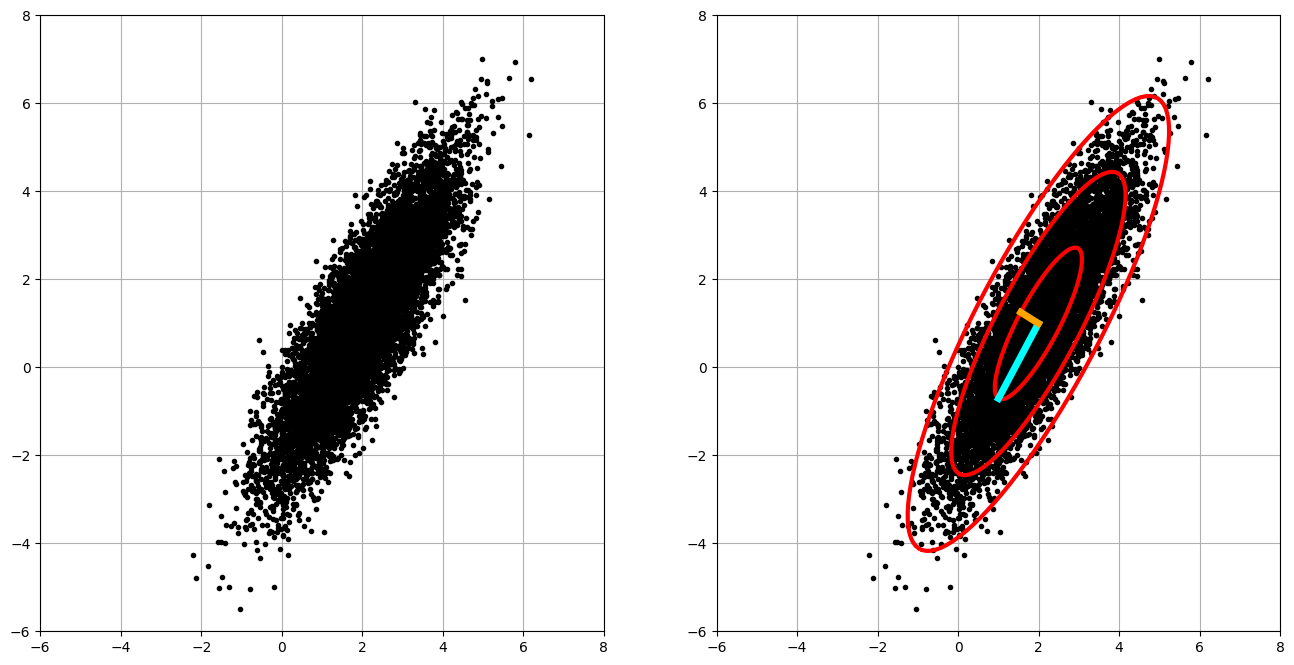

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

## f_ch01_ex03_1b

Xavg = np.mean(X,axis=1)                  # Compute mean
B = X - np.tile(Xavg,(nPoints,1)).T       # Mean-subtracted data

# Find principal components (SVD)
if True:
    U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=False)
else:
    U, S, VT = np.linalg.svd(B,full_matrices=False)
    U = U / np.sqrt(nPoints)
    VT = VT / np.sqrt(nPoints)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S)
print("Xavg")
print(Xavg.shape)
print(Xavg)
print(Xstd.shape)
print(Xstd)
# pca = Xavg + np.matmul(U, np.diag(S))
pca = np.matmul(U, np.diag(S))
print("pca")
print(pca.shape)
print(pca)

circle = np.array([np.cos(theta),np.sin(theta)]) # points on a unit circle
Xstd = Xstd @ circle


ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]

print("pc")
print(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]))
print(np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]))

print(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]))
print(np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]))

print("pca")
x1 = np.array([Xavg[0], pca[0, 0]])
y1 = np.array([Xavg[1], pca[1, 0]])

x2 = np.array([Xavg[0], pca[0, 1]])
y2 = np.array([Xavg[1], pca[1, 1]])
print(x1)
print(y1)
print(x2)
print(y2)

ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='orange',linewidth=5)

plt.show()



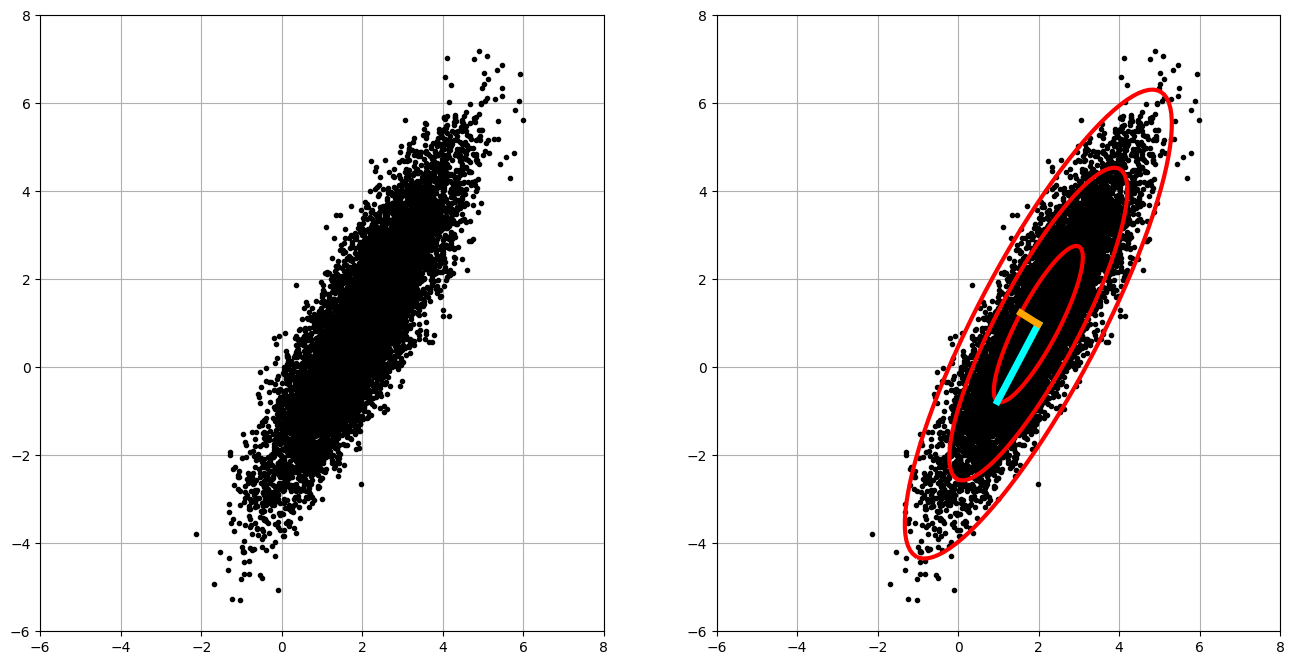

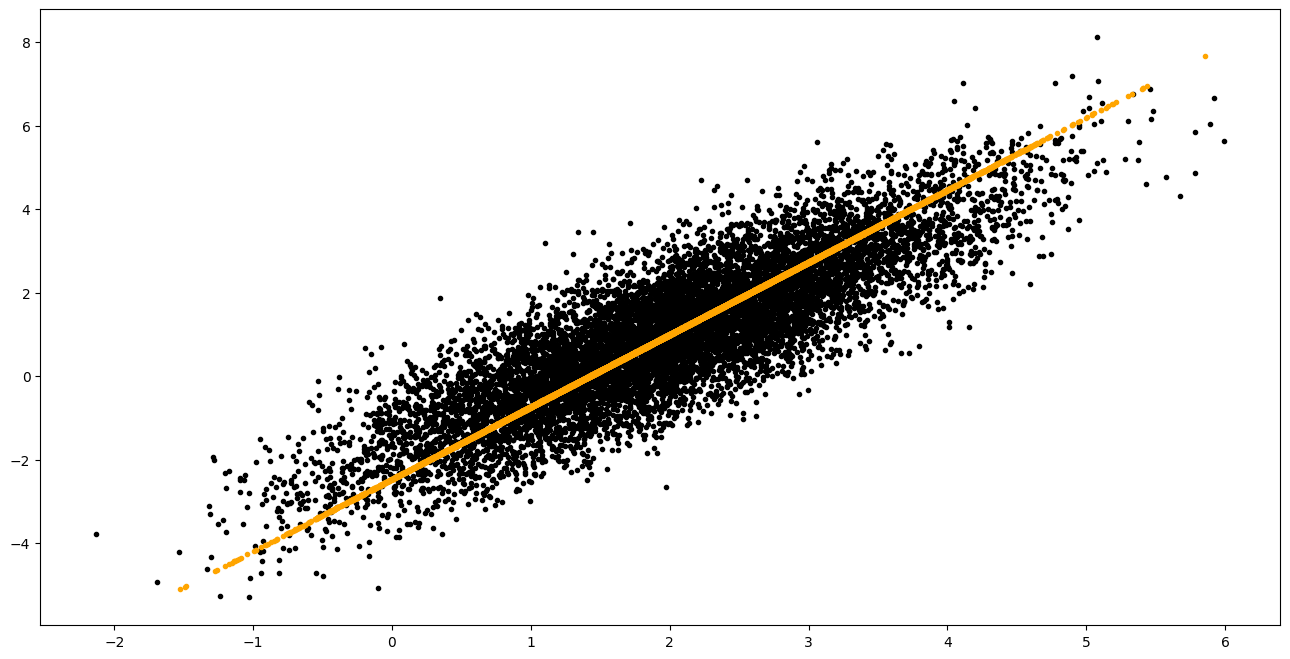

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [16, 8]

xC = np.array([2, 1])      # Center of data (mean)
sig = np.array([2, 0.5])   # Principal axes

theta = np.pi/3            # Rotate cloud by pi/3

R = np.array([[np.cos(theta), -np.sin(theta)],     # Rotation matrix
              [np.sin(theta), np.cos(theta)]])

nPoints = 10000            # Create 10,000 points
X = R @ np.diag(sig) @ np.random.randn(2,nPoints) + np.diag(xC) @ np.ones((2,nPoints))

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

Xavg = np.mean(X,axis=1)                  # Compute mean
Xmean = np.tile(Xavg,(nPoints,1)).T
B = X - Xmean        # Mean-subtracted data

# Find principal components (SVD)
U, S, VT = np.linalg.svd(B/np.sqrt(nPoints),full_matrices=False)

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)

# 1-std confidence interval
Xstd = U @ np.diag(S)

circle = np.array([np.cos(theta),np.sin(theta)]) # points on a unit circle
Xstd = Xstd @ circle


ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='orange',linewidth=5)

plt.show()


# plt.plot(B[0,:],B[1,:], '.', color='k')
# plt.plot(X[0,:],X[1,:], '.', color='k')

X_recover = ((U @ np.diag(S))[:, :1] @ VT[:1]) * np.sqrt(nPoints)+ Xmean
# X_recover = ((U @ np.diag(S)) @ VT) * np.sqrt(nPoints) + Xmean
plt.plot(X[0,:],X[1,:], '.', color='k')
plt.plot(X_recover[0,:],X_recover[1,:], '.', color='orange')
plt.show()



In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:

def svd_flip(u, v, u_based_decision=True):
    if u_based_decision:
        # columns of u, rows of v
        max_abs_cols = tf.argmax(tf.abs(u), axis=0)
        signs = tf.sign(tf.gather(u, max_abs_cols, axis=1))
        signs_expanded = tf.expand_dims(signs, axis=0)
        u *= signs_expanded
        v *= tf.transpose(signs_expanded, perm=[0, 2, 1])
    else:
        # rows of v, columns of u
        max_abs_rows = tf.argmax(tf.abs(v), axis=1)
        signs = tf.sign(tf.gather(v, max_abs_rows, axis=0))
        signs_expanded = tf.expand_dims(signs, axis=-1)
        u *= signs_expanded
        v *= signs_expanded

    return u, v

10000
tf.Tensor([1.9780834 1.0234383], shape=(2,), dtype=float32)
Xmean:  tf.Tensor(
[[1.9780834 1.0234383]
 [1.9780834 1.0234383]
 [1.9780834 1.0234383]
 ...
 [1.9780834 1.0234383]
 [1.9780834 1.0234383]
 [1.9780834 1.0234383]], shape=(10000, 2), dtype=float32)
--------------------------------------------------
tf.Tensor([1.9953486  0.49796137], shape=(2,), dtype=float32)
tf.Tensor(
[[ 0.00109203  0.02587201]
 [ 0.00381971 -0.00681217]
 [ 0.00796037  0.00153037]
 ...
 [ 0.00723116 -0.01162062]
 [-0.00216507 -0.00323643]
 [-0.0039333  -0.01444691]], shape=(10000, 2), dtype=float32)
tf.Tensor(
[[-0.5008579   0.86552954]
 [ 0.86552954  0.5008579 ]], shape=(2, 2), dtype=float32)


(-6.0, 8.0)

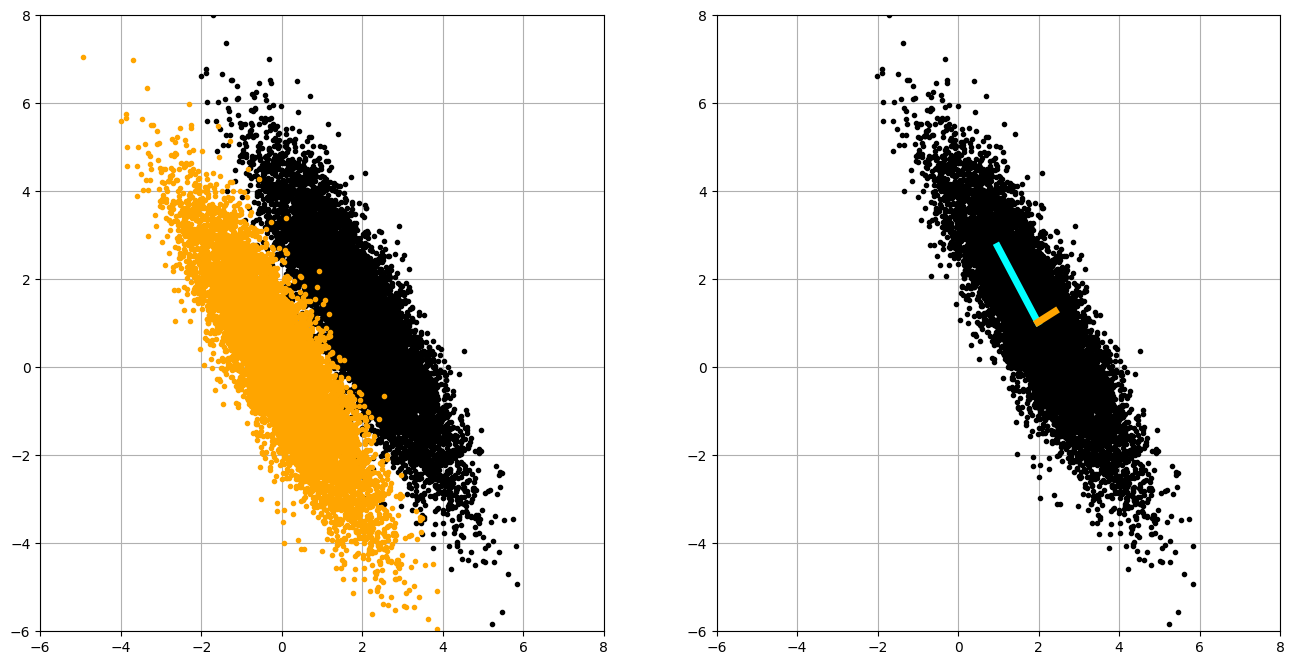

In [6]:

plt.rcParams['figure.figsize'] = [16, 8]

xC = tf.constant([2, 1], dtype=tf.float32)  # Center of data (mean)
sig = tf.constant([2, 0.5], dtype=tf.float32)  # Principal axes

# theta = tf.constant(math.pi, dtype=tf.float32) / 3  # Rotate cloud by pi/3
theta = tf.convert_to_tensor(math.pi / 3, dtype=tf.float32)  # Rotate cloud by pi/3
nPoints = 10000  # Create 10,000 points
print(nPoints)

R = tf.constant([[0.5, -0.8660254], [0.8660254, 0.5]])

randn = tf.random.normal(shape=(nPoints, 2), dtype=tf.float32)
X = randn @ (tf.linalg.diag(sig) @ R) +  tf.ones((nPoints, 2)) @ tf.linalg.diag(xC)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[:, 0], X[:, 1], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))


Xavg = tf.reduce_mean(X, axis=0)  # Compute mean
print(Xavg)
Xmean = tf.tile(tf.expand_dims(Xavg, axis=0), [nPoints, 1])  # Mean-subtracted data
print("Xmean: ", Xmean)
B = X - Xmean

ax1.plot(B[:, 0], B[:, 1], '.', color='orange')

B_scaled = B / np.sqrt(nPoints)
# B_scaled = B / tf.sqrt(tf.constant(nPoints, dtype=tf.float32))
# B_scaled = tf.transpose(B_scaled)
# print("B_scaled shape: ", B_scaled.shape)
# Find principal components (SVD)
S, U, V = tf.linalg.svd(B_scaled, full_matrices=False)

VT = tf.transpose(V) # adjoint is just transpose in real case
# U, VT = svd_flip(U, VT)

# VT = tf.transpose(VT)

print("-" * 50)
print(S)
print(U)
print(V)

# principle components
pc = tf.matmul(tf.linalg.diag(S), VT)

# X_recover = (U @ tf.matmul(tf.linalg.diag(S), V[:1], adjoint_b=True)) * np.sqrt(nPoints) + Xmean
# X_recover = (U @ tf.matmul(tf.linalg.diag(S), V, adjoint_b=True)) * np.sqrt(nPoints) + Xmean
X_recover = (U @ pc) * np.sqrt(nPoints) + Xmean
ax2 = fig.add_subplot(122)
# ax2.plot(X[:, 0], X[:, 1], '.', color='k')  # Plot data to overlay PCA
ax2.plot(X_recover[:, 0], X_recover[:, 1], '.', color='k')  # Plot data to overlay PCA

ax2.plot(np.array([Xavg[0], Xavg[0] + pc[0,0]]),
         np.array([Xavg[1], Xavg[1] + pc[0,1]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0] + pc[1,0]]),
         np.array([Xavg[1], Xavg[1] + pc[1,1]]),'-',color='orange',linewidth=5)

ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

# print(X)
# print(X_recover)

In [195]:

plt.rcParams['figure.figsize'] = [16, 8]

xC = tf.constant([2, 1], dtype=tf.float32)  # Center of data (mean)
sig = tf.constant([2, 0.5], dtype=tf.float32)  # Principal axes

# theta = tf.constant(math.pi, dtype=tf.float32) / 3  # Rotate cloud by pi/3
theta = tf.convert_to_tensor(math.pi / 3, dtype=tf.float32)  # Rotate cloud by pi/3
nPoints = 10000  # Create 10,000 points
print(nPoints)

# tf.cos(theta)
# R = tf.zeros([2, 2], tf.float32)
# R[0, 0] += tf.cos(theta)
# R[0, 1] += -tf.sin(theta)
# R[1, 0] += tf.sin(theta)
# R[1, 1] += tf.cos(theta)
# R = tf.constant([[tf.cos(theta), -tf.sin(theta)],
#                  [tf.sin(theta), tf.cos(theta)]], dtype=tf.float32)


# tf.Tensor([[tf.cos(theta), -tf.sin(theta)], [tf.sin(theta), -tf.cos(theta)]], shape=(2, 2), dtype=tf.float32)
# tf.Tensor([[tf.cos(theta), -tf.sin(theta)], [tf.sin(theta), -tf.cos(theta)]], shape=(2, 2), dtype=tf.float32)
# tf.constant([[tf.cos(theta), -tf.sin(theta)], [tf.sin(theta), -tf.cos(theta)]])

# fixed tensor:

R = tf.constant([[0.5, -0.8660254], [0.8660254, 0.5]])

randn = tf.random.normal(shape=(nPoints, 2), dtype=tf.float32)
print("randn shape: ", randn.shape)
X = tf.matmul(randn, tf.matmul(R, tf.linalg.diag(sig))) + tf.matmul(tf.ones((nPoints, 2), tf.linalg.diag(xC), dtype=tf.float32))
print("X shape: ", X.shape)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0, :], X[1, :], '.', color='k')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))


Xavg = tf.reduce_mean(X, axis=1)  # Compute mean
Xmean = tf.tile(tf.expand_dims(Xavg, axis=1), [1, nPoints])  # Mean-subtracted data
print("Xmean: ", Xmean)
B = X - Xmean

tf.math.sqrt(tf.constant(nPoints, dtype=tf.float32))

B_scaled = B
# B_scaled = B / tf.sqrt(tf.constant(nPoints, dtype=tf.float32))
B_scaled = tf.transpose(B_scaled)
print("B_scaled shape: ", B_scaled.shape)
# Find principal components (SVD)
S, U, VT = tf.linalg.svd(B_scaled, full_matrices=False)

temp = U
U = VT
VT = temp

print("U shape: ", U.shape)
print("U: ", U)
print("S shape: ", S.shape)
print("S: ", S)
print("VT shape: ", VT.shape)
print("VT: ", VT)

X_reconstructed = U @ tf.linalg.diag(S) @ VT

ax2 = fig.add_subplot(122)
ax2.plot(X[0, :], X[1, :], '.', color='k')  # Plot data to overlay PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))


theta = 2 * np.pi * np.arange(0, 1, 0.01)

# 1-std confidence interval
Xstd = tf.matmul(U, tf.linalg.diag(S))

circle = tf.constant(np.array([tf.cos(theta), tf.sin(theta)]), dtype=tf.float32)  # points on a unit circle
Xstd = tf.matmul(Xstd, circle)

ax2.plot(Xavg[0] + Xstd[0, :], Xavg[1] + Xstd[1, :], '-', color='r', linewidth=3)
ax2.plot(Xavg[0] + 2 * Xstd[0, :], Xavg[1] + 2 * Xstd[1, :], '-', color='r', linewidth=3)
ax2.plot(Xavg[0] + 3 * Xstd[0, :], Xavg[1] + 3 * Xstd[1, :], '-', color='r', linewidth=3)

# Plot principal components U[:,0]S[0] and U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0] + U[0, 0] * S[0]]),
         np.array([Xavg[1], Xavg[1] + U[1, 0] * S[0]]), '-', color='cyan', linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0] + U[0, 1] * S[1]]),
         np.array([Xavg[1], Xavg[1] + U[1, 1] * S[1]]), '-', color='orange', linewidth=5)


principle_components = tf.matmul(U, tf.linalg.diag(S)) / tf.sqrt(tf.constant(nPoints, dtype=tf.float32))

ax1.plot(np.array([Xavg[0], Xavg[0] + principle_components[0, 0]]),
         np.array([Xavg[1], Xavg[1] + principle_components[1, 0]]), '-', color='cyan', linewidth=5)
ax1.plot(np.array([Xavg[0], Xavg[0] + principle_components[0, 1]]),
         np.array([Xavg[1], Xavg[1] + principle_components[1, 1]]), '-', color='orange', linewidth=5)

plt.show()

plt.plot(B[0,:],B[1,:], '.', color='k')
plt.show()

plt.plot(X_reconstructed[0,:],X_reconstructed[1,:], '.', color='k')
plt.show()



10000
randn shape:  (10000, 2)


TypeError: Got multiple values for argument 'dtype'

[0 3]


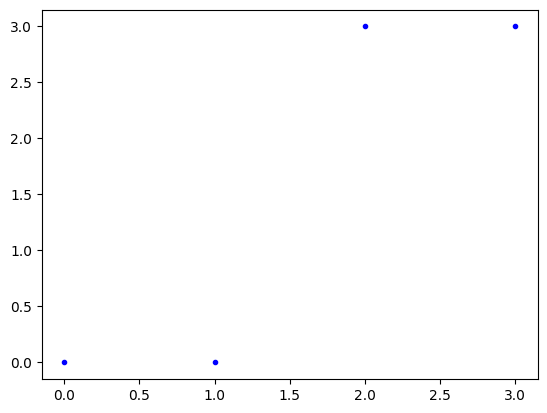

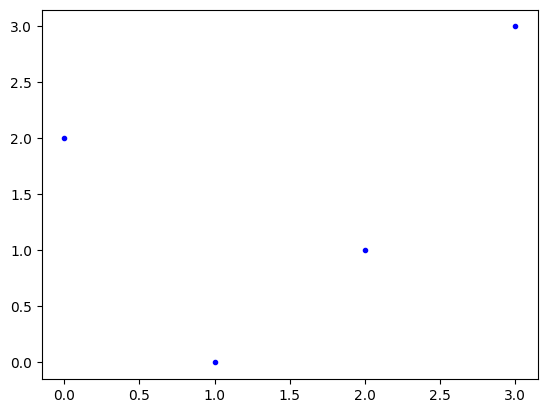

In [5]:
import matplotlib.pyplot as plt
import numpy as np


xs = np.array([[0, 1], [2, 3]])
ys = np.array([[2, 0], [1, 3]])

print(ys[:, 1])
plt.plot(xs, ys[:, 1], 'b.')
plt.show()

xs = np.array([0, 1, 2, 3])
ys = np.array([2, 0, 1, 3])

plt.plot(xs, ys, 'b.')
plt.show()
